# Importing Libraries

### In this analysis, we required basic python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading DATA

In [3]:
data = pd.read_csv("C:\\Users\\VamsiKumar Gudala\\vamsi\\project 1\\weatherHistory.csv")

## A little bit of data Exploration

#### * Visualize
#### * Find Missing
#### * Look for corrections

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily_Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


## Data processing

##### Checking for No.of Null values

In [9]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily_Summary                 0
dtype: int64

In [10]:
data.shape

(96453, 11)

In [11]:
data=data.drop(['Precip Type'],axis=1)

In [12]:
data.shape

(96453, 10)

### Categorical Data

In [13]:
data.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [14]:
data['Daily_Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [15]:
data['Daily_Summary'].value_counts()

Mostly cloudy throughout the day.                                                             20085
Partly cloudy throughout the day.                                                              9981
Partly cloudy until night.                                                                     6169
Partly cloudy starting in the morning.                                                         5184
Foggy in the morning.                                                                          4201
                                                                                              ...  
Partly cloudy throughout the day and breezy in the afternoon.                                    24
Partly cloudy starting in the afternoon and breezy in the afternoon.                             24
Overcast throughout the day and breezy overnight.                                                24
Mostly cloudy throughout the day and windy starting in the morning continuing until night.       24


### Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
#Summary
le = LabelEncoder()
le.fit(data.Summary.drop_duplicates()) 
data.Summary = le.transform(data.Summary)
#Daily_Summary
le = LabelEncoder()
le.fit(data.Daily_Summary.drop_duplicates()) 
data.Daily_Summary = le.transform(data.Daily_Summary)



In [17]:
data.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily_Summary
0,2006-04-01 00:00:00.000 +0200,19,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,197
1,2006-04-01 01:00:00.000 +0200,19,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,197
2,2006-04-01 02:00:00.000 +0200,17,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,197
3,2006-04-01 03:00:00.000 +0200,19,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,197
4,2006-04-01 04:00:00.000 +0200,17,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,197


<AxesSubplot:>

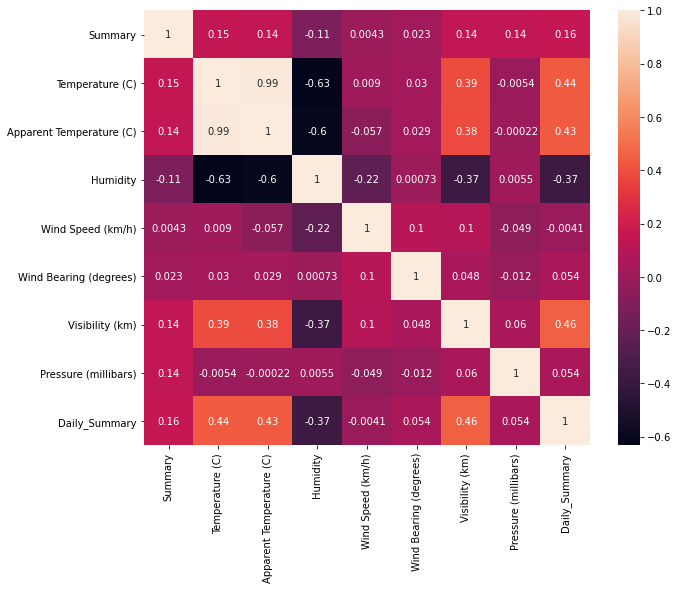

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, ax =ax, annot = True)

#### Clearly, a  correlation is observed  with the fact of summary, Temperature(C), Apparent temperature(C),visibility(Km)

## Data Cleaning

In [28]:
Clean_data = data.drop(['Daily_Summary','Wind Bearing (degrees)','Summary','Temperature (C)','Wind Speed (km/h)','Visibility (km)','Pressure (millibars)'], axis = 1)
Clean_data.head()

,Formatted Date,Apparent Temperature (C),Humidity
1970-01-01 00:00:00+00:00,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1970-01-01 00:00:00.000000001+00:00,2006-04-01 01:00:00.000 +0200,7.227778,0.86
1970-01-01 00:00:00.000000002+00:00,2006-04-01 02:00:00.000 +0200,9.377778,0.89
1970-01-01 00:00:00.000000003+00:00,2006-04-01 03:00:00.000 +0200,5.944444,0.83
1970-01-01 00:00:00.000000004+00:00,2006-04-01 04:00:00.000 +0200,6.977778,0.83


In [32]:
Clean_data.isnull().sum()

Formatted Date              0
Apparent Temperature (C)    0
Humidity                    0
dtype: int64

### Changing the timezone: converting it into +UTC

In [34]:
Clean_data['Formatted Date'] = pd.to_datetime(Clean_data['Formatted Date'],utc=True)
Clean_data = Clean_data.set_index('Formatted Date')
data = Clean_data[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
data

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


## Visualizing the Data

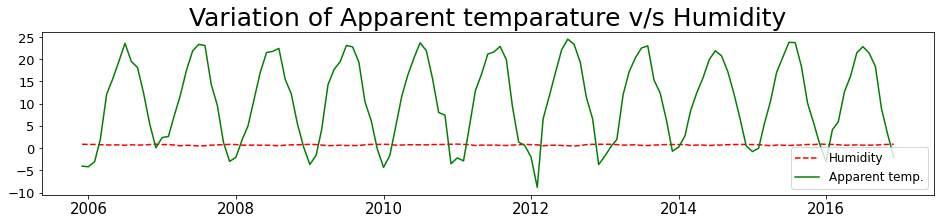

In [37]:
plt.figure(figsize=(16,3));
plt.plot(data['Humidity'], label = 'Humidity', color = 'r',linestyle='dashed');
plt.plot(data['Apparent Temperature (C)'], label = 'Apparent temp.',color = 'g');
plt.title('Variation of Apparent temparature v/s Humidity', fontsize= 25);
plt.legend(loc = 0, fontsize = 12);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 13);

Text(0.5, 1.0, 'Humidity v/s Apparent Temperature')

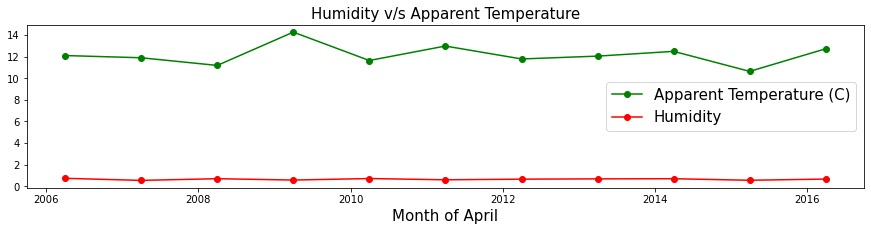

In [47]:
    april_month = data[data.index.month==4]
    plt.figure(figsize=(15,3))
    plt.plot(april_month.loc['2006-04-01':'2016-04-01', 'Apparent Temperature (C)'], marker='o', linestyle='-',label='Apparent Temperature (C)',color = 'g');
    plt.plot(april_month.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity',color = 'r');
    plt.legend(loc = 'center right',fontsize = 15);
    plt.xlabel('Month of April', fontsize = 15);
    plt.title('Humidity v/s Apparent Temperature',fontsize = 15)